In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(
    32,#convolution, creates a 32 pixel output from the (28,28,1) CHECK WRITTEN NOTEBOOK
    (3,3),#SLICE OF THE (28,28) IT'S CONVOLUTION IN 2D, THATS WHY THERE IS ONLY (3,3)
    activation = 'relu',
    input_shape=(28,28,1)#28*28 pixel, 1=greyscale(depth)
))

model.add(layers.MaxPooling2D((2,2))) #POOLING IN 2*2 2D SLICES
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [23]:
model.compile(#NEURAL NETWORK NEEDS TO BE COMPILED
    optimizer = 'rmsprop', #GOOD OPTIMIZER FOR STARTING. NNs START WITH BIG STEPS AND REDUCE STEP SIZE
    loss='categorical_crossentropy', metrics = ['accuracy']#HOW FAR IS THE TRUE RESULT FROM THE PREDICTED RESULT. DISTANCES BETWEEN PROBABILITY DISTRIBUTION
)

Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


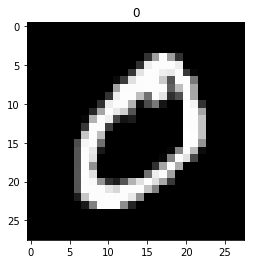

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Train: ', train_images.shape)
print('Test: ', test_images.shape)

#print(train_images[1])

plt.imshow(train_images[1],cmap='gray')
plt.title(str(train_labels[1]))
plt.show()

train_images = train_images.reshape((60000, 28, 28, 1))#proper shape
train_images = train_images.astype('float32')/255.0#normalization

test_images = test_images.reshape((10000, 28,28,1))#proper shape
test_images = test_images.astype('float32')/255.0#normalization

from keras.utils import to_categorical

print('Before:', train_labels[0])
train_labels = to_categorical(train_labels)#category = probability 
test_labels = to_categorical(test_labels)
print('After:', train_labels[0])

In [ ]:
history = model.fit(train_images, train_labels, #NOW WE TRAIN THE NEURAL NETWORK
          epochs = 5, #number of iterations
          batch_size = 64)#divide the data in batches to paralellize and reduce time

Epoch 1/5
 4416/60000 [=>............................] - ETA: 32:21 - loss: 0.9980 - acc: 0.6660

In [1]:
#(history.history)
plt.plot(history.history['loss'],label = 'loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.show()
plt.close()

NameError: name 'plt' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(train_images, train_labels)#TEST THE NEURAL NETWORK
print(test_loss, test_acc)